In [21]:
from puzzle.puzzle_board import PuzzleBoard
from puzzle.search_result import SearchResult
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Define initial and goal states as lists
initial_states = ["123804765", "123804765", "123804765", "134805726", "231708654", "231804765", 
                  "123804765", "283104765", "876105234", "867254301", "647850321", "123804765",
                  "806547231", "641302758", "158327064", "328451670", "035428617", "725310648", 
                  "412087635", "162573048"]

goal_states = ["134862705", "281043765", "281463075", "123804765", "123804765", "123804765",
               "231804765", "123804765", "123804765", "123456780", "123456780", "567408321",
               "012345678", "012345678", "012345678", "012345678", "012345678", "012345678", 
               "123456780", "123456780"]

In [3]:
# Define algorithms and their heuristics
algorithms = {
    "bfs": None,
    "dfs": None,
    "iddfs": None,
    "a*": ["euclidean", "manhattan", "linear_conflict"],
    "gbfs": ["euclidean", "manhattan", "linear_conflict"]
}

In [4]:
# Data storage
data = []

# Run each configuration
for initial, goal in zip(initial_states, goal_states):
    for algo, heuristics in algorithms.items():
        if heuristics is None:  # Algorithms without heuristics
            game = PuzzleBoard(initial, algo, None, goal)
            result: SearchResult = game.solve()
            data.append([initial, goal, algo, None, result.runtime_duration, result.nodes_expanded, 
                         result.search_depth, result.path_to_goal, result.path_cost, result.states_to_goal])
        else:  # Algorithms with heuristics
            for heuristic in heuristics:
                game = PuzzleBoard(initial, algo, heuristic, goal)
                result: SearchResult = game.solve()
                data.append([initial, goal, algo, heuristic, result.runtime_duration, result.nodes_expanded, 
                             result.search_depth, result.path_to_goal, result.path_cost, result.states_to_goal])

In [5]:
# Create DataFrame
columns = ["Initial State", "Goal State", "Algorithm", "Heuristic", "Runtime Duration", "Nodes Expanded", 
           "Search Depth", "Path to Goal", "Path Cost", "States to Goal"]
df = pd.DataFrame(data, columns=columns)

In [6]:
# Save as CSV for further analysis
df.to_csv("puzzle_analysis_results.csv", index=False)

In [14]:
# remove path to goal from the dataframe
df2 = df.drop(columns=["Path to Goal", "States to Goal"])

In [15]:
# merge algorithms and heuristics like this "algo + heuristic"
df2["Algorithm"] = df2["Algorithm"] + " " + df2["Heuristic"].fillna("") 
df2 = df2.drop(columns=["Heuristic"])

In [17]:
df2.to_csv("puzzle_analysis_results.csv", index=False)

In [18]:
df2

,Initial State,Goal State,Algorithm,Runtime Duration,Nodes Expanded,Search Depth,Path Cost
0,123804765,134862705,bfs,0.000994,40,5,5
1,123804765,134862705,dfs,0.047052,9305,8905,8905
2,123804765,134862705,iddfs,0.000000,86,5,5
3,123804765,134862705,a* euclidean,0.000000,7,5,5
4,123804765,134862705,a* manhattan,0.001003,9,5,5
...,...,...,...,...,...,...,...
175,162573048,123456780,a* manhattan,0.001003,13,10,10
176,162573048,123456780,a* linear_conflict,0.001941,35,10,10
177,162573048,123456780,gbfs euclidean,0.000000,41,12,12
178,162573048,123456780,gbfs manhattan,0.001051,12,10,10


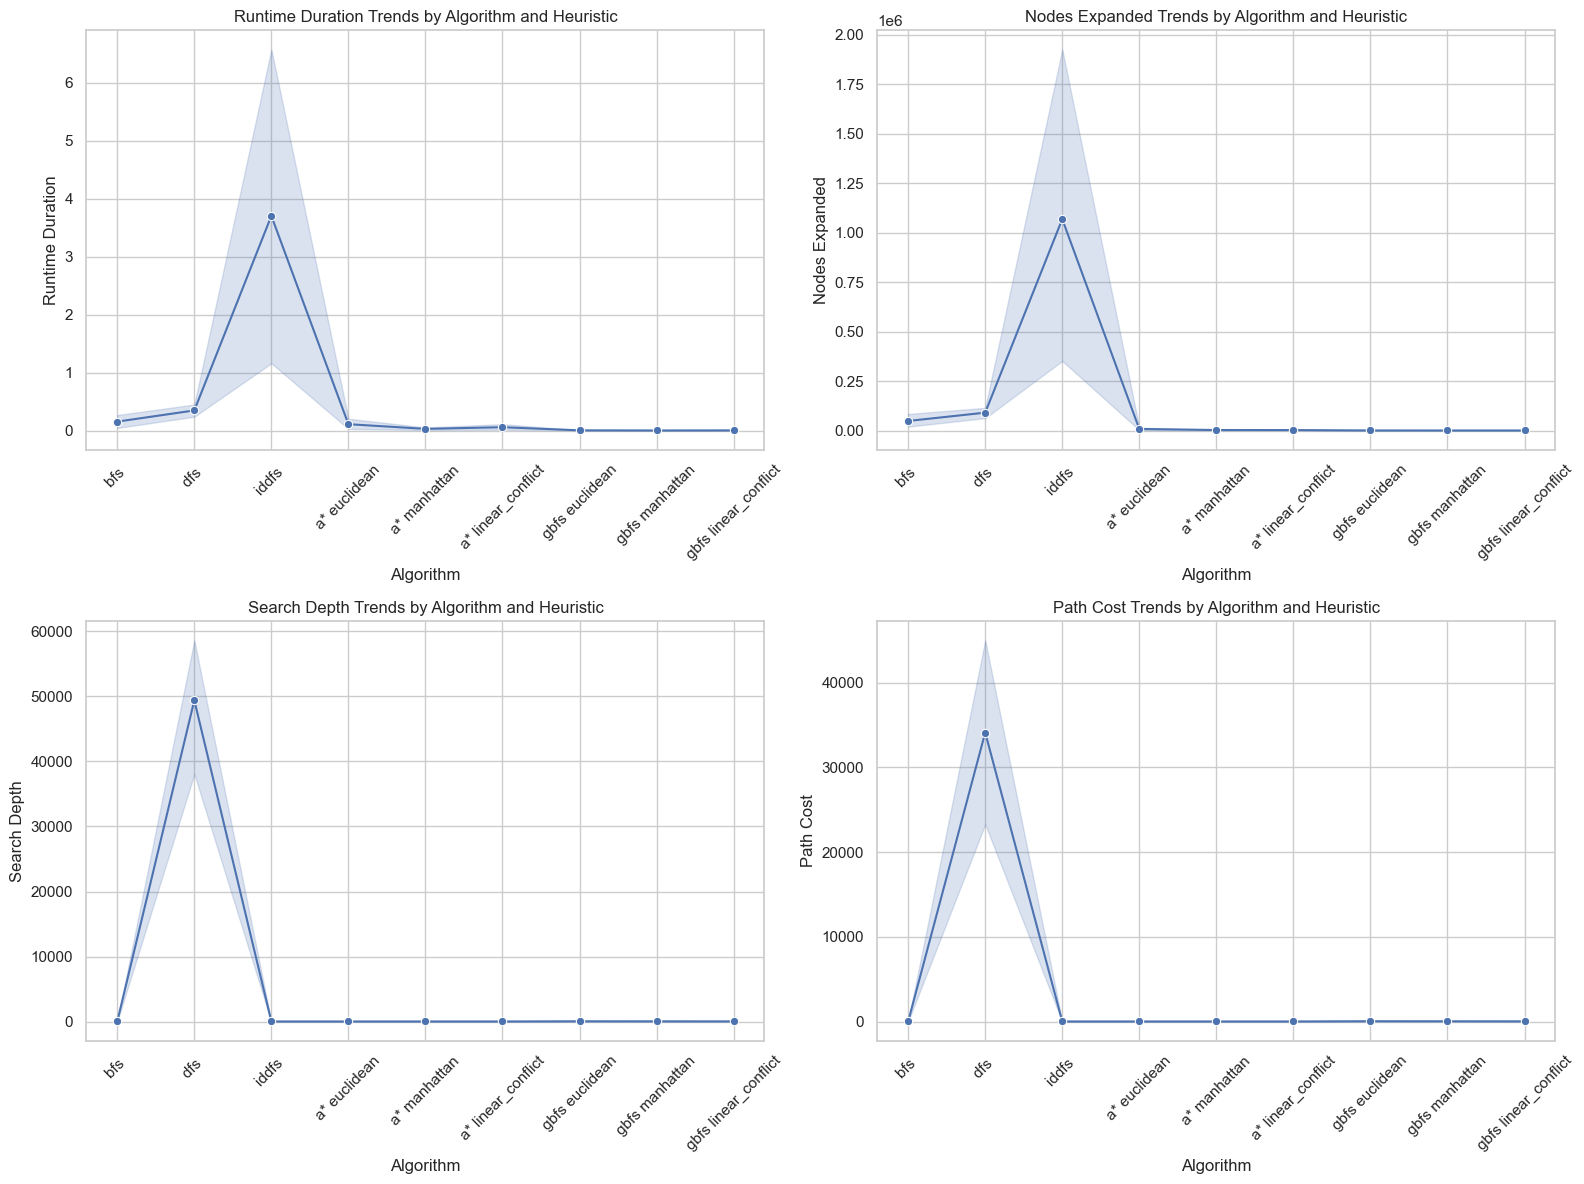

In [42]:
# Define the figure and size
plt.figure(figsize=(16, 12))

# Metrics to plot
metrics = ["Runtime Duration", "Nodes Expanded", "Search Depth", "Path Cost"]

# Generate a line plot for each metric
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.lineplot(data=df2, x="Algorithm", y=metric, marker='o')
    plt.title(f"{metric} Trends by Algorithm and Heuristic")
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()


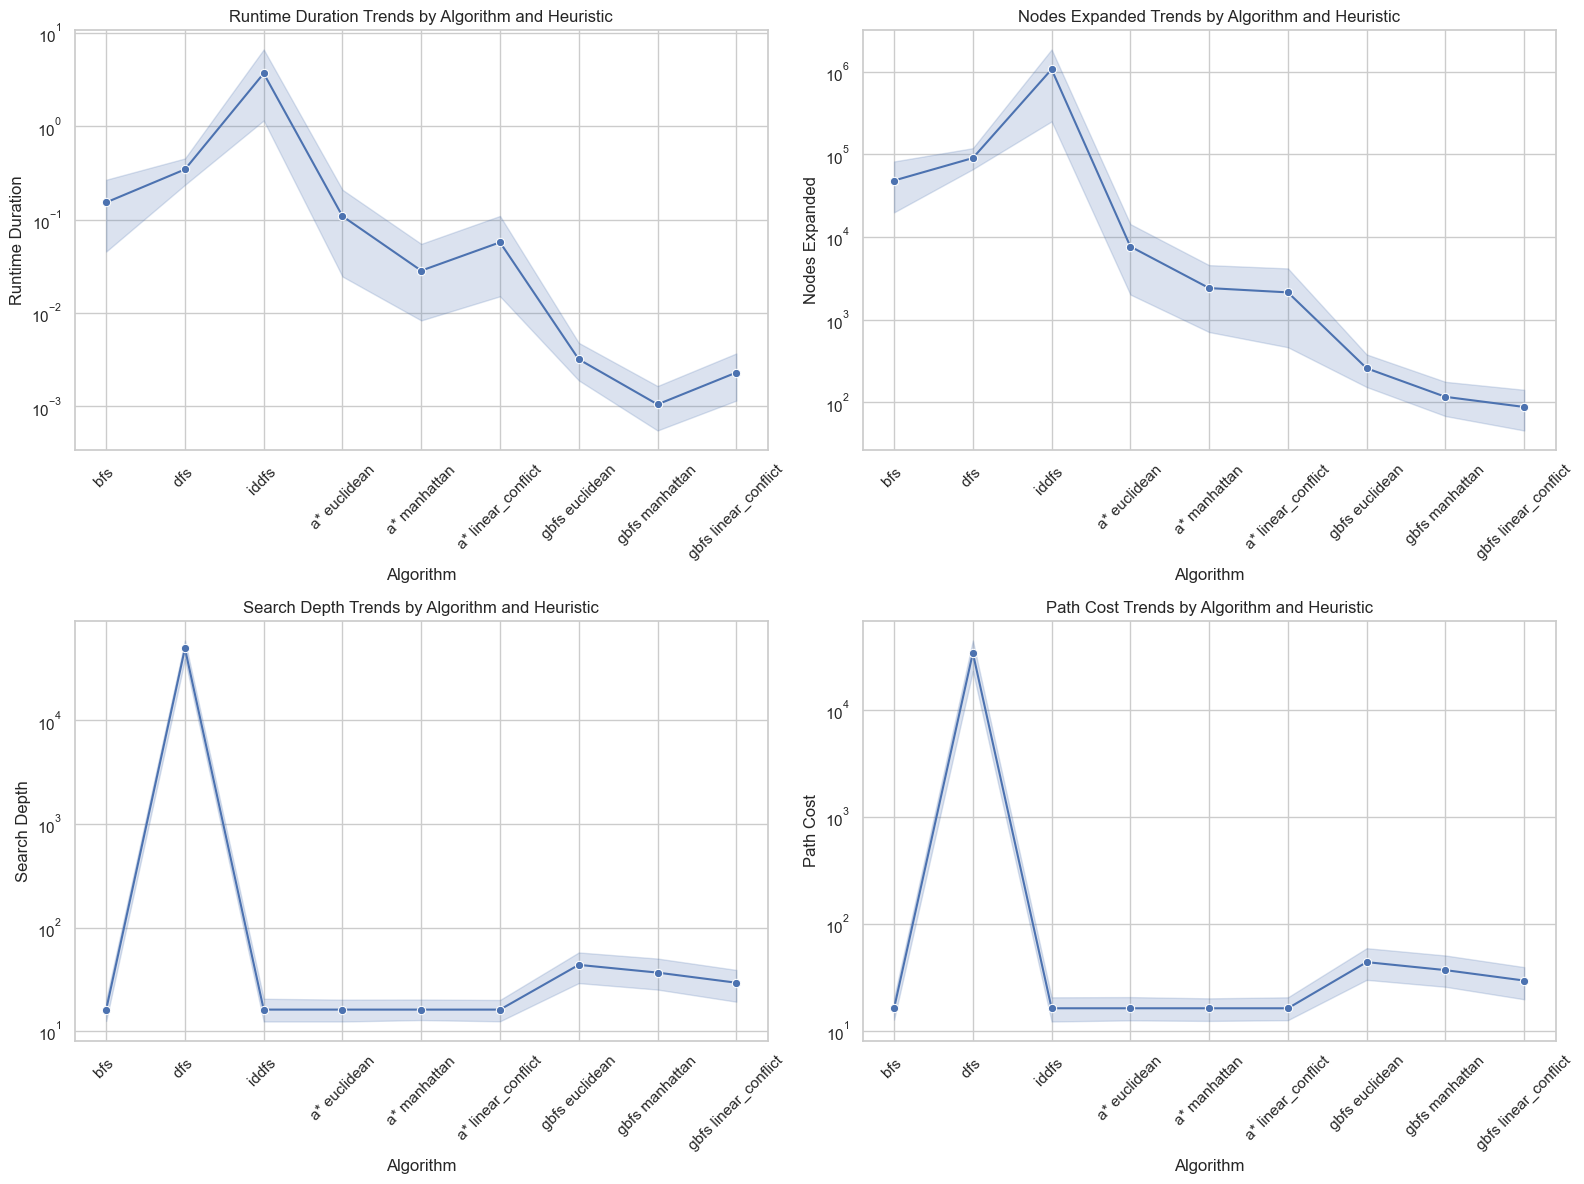

In [28]:
# Define the figure and size
plt.figure(figsize=(16, 12))

# Metrics to plot
metrics = ["Runtime Duration", "Nodes Expanded", "Search Depth", "Path Cost"]

# Generate a line plot for each metric
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.lineplot(data=df2, x="Algorithm", y=metric, marker='o')
    # make y-axis log scale for better visualization
    plt.yscale("log")
    plt.title(f"{metric} Trends by Algorithm and Heuristic")
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()


In [39]:
df3 = df.drop(columns=["Path to Goal", "States to Goal"])
# only keep the a* algorithm
df3 = df3[df3["Algorithm"] == "a*"]
df3 = df3.drop(columns=["Algorithm"])
df3 = df3.reset_index(drop=True)
df3

,Initial State,Goal State,Heuristic,Runtime Duration,Nodes Expanded,Search Depth,Path Cost
0,123804765,134862705,euclidean,0.000000,7,5,5
1,123804765,134862705,manhattan,0.001003,9,5,5
2,123804765,134862705,linear_conflict,0.000000,7,5,5
3,123804765,281043765,euclidean,0.000985,25,9,9
4,123804765,281043765,manhattan,0.000000,30,9,9
5,123804765,281043765,linear_conflict,0.000999,26,9,9
6,123804765,281463075,euclidean,0.001002,53,12,12
7,123804765,281463075,manhattan,0.000000,57,12,12
8,123804765,281463075,linear_conflict,0.001007,26,12,12
9,134805726,123804765,euclidean,0.000000,7,6,6


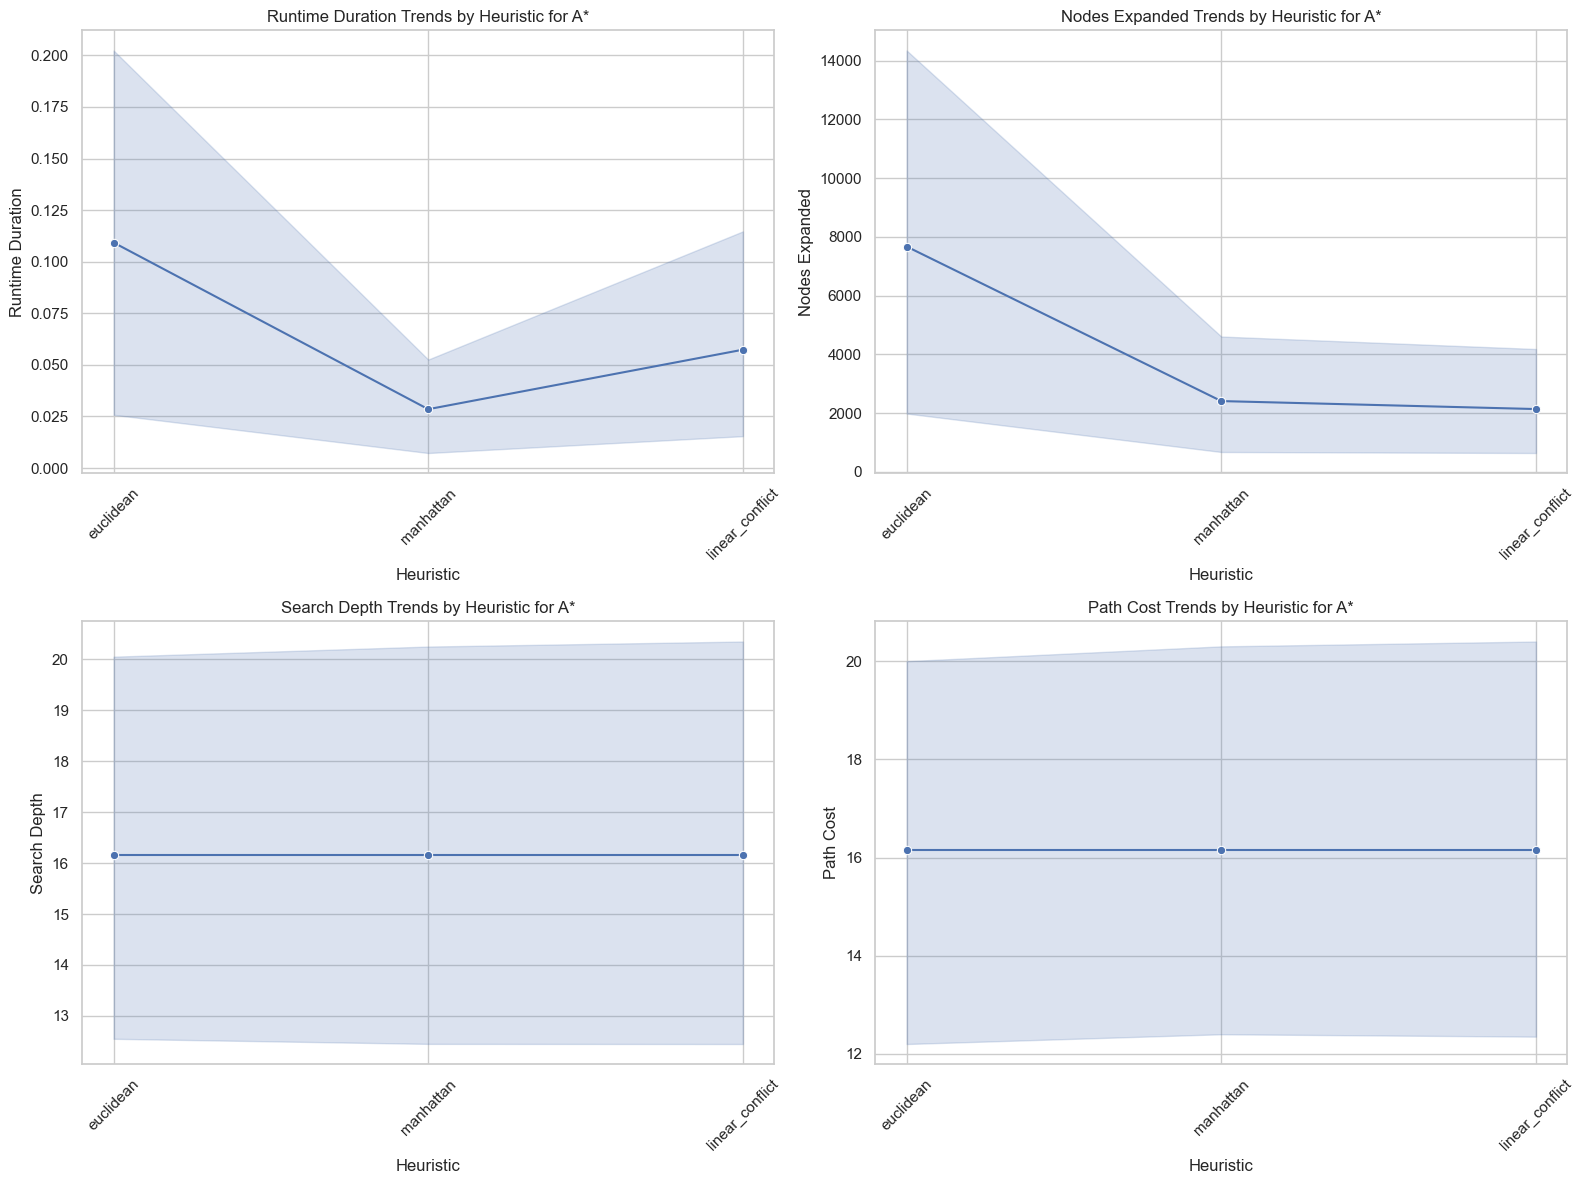

In [41]:
# same plot as before but only for the a* algorithm
plt.figure(figsize=(16, 12))

# Metrics to plot
metrics = ["Runtime Duration", "Nodes Expanded", "Search Depth", "Path Cost"]

# Generate a line plot for each metric
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.lineplot(data=df3, x="Heuristic", y=metric, marker='o')
    plt.title(f"{metric} Trends by Heuristic for A*")
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

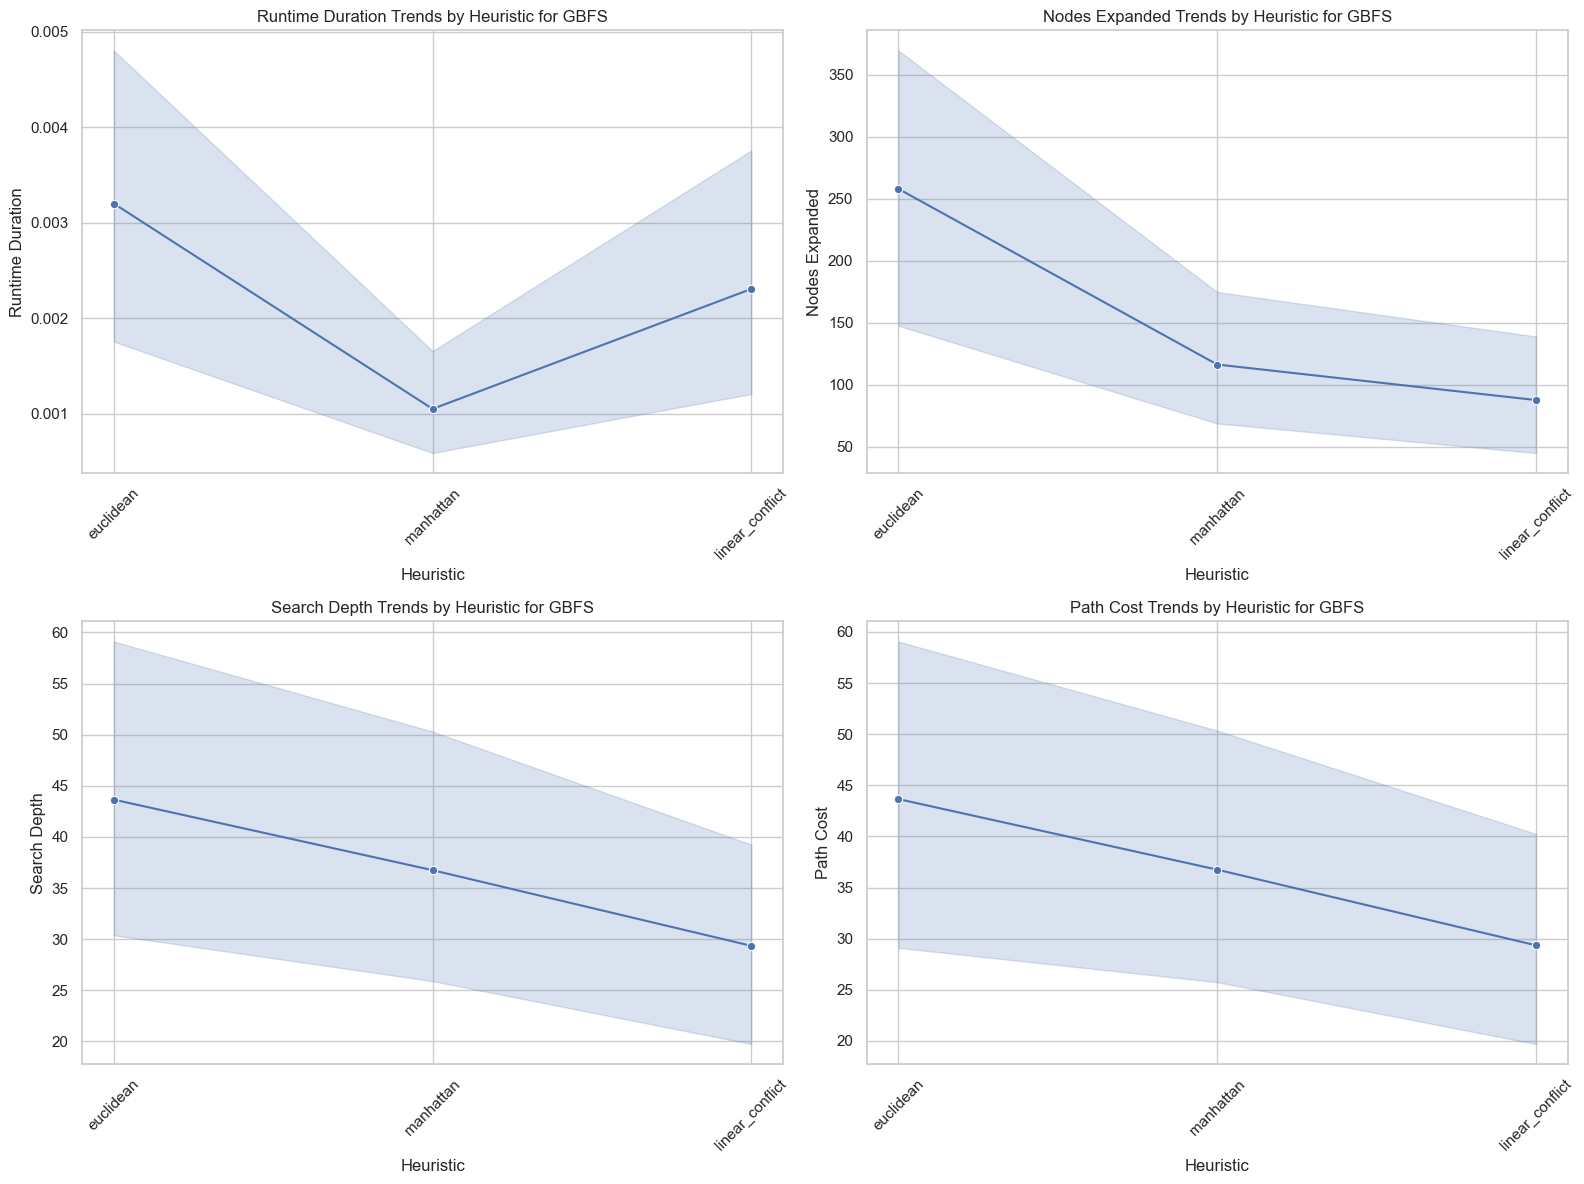

In [44]:
df4 = df.drop(columns=["Path to Goal", "States to Goal"])
df4 = df4[df4["Algorithm"] == "gbfs"]
df4 = df4.drop(columns=["Algorithm"])
df4 = df4.reset_index(drop=True)

plt.figure(figsize=(16, 12))

# Metrics to plot
metrics = ["Runtime Duration", "Nodes Expanded", "Search Depth", "Path Cost"]

# Generate a line plot for each metric
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.lineplot(data=df4, x="Heuristic", y=metric, marker='o')
    plt.title(f"{metric} Trends by Heuristic for GBFS")
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()